# Play with a pre-trained VGGNet (16) in Keras

In [1]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions

Using TensorFlow backend.


## Fetching a pretrained model in Keras

In [2]:
model = VGG16(weights='imagenet', include_top=True)

Let's have a look on our pre-trained model which should be the model we can find in the VGGNet paper

<img src="images/vgg.png" alt="VGGNet" style="width: 600px;"/>

In [3]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'Relu_1:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'Relu_2:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'Relu_3:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'MaxPool_1:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'Relu_4:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'Relu_5:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'Relu_6:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'MaxPool_2:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'Relu_7:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_conv2': <tf.Tensor 'Relu_8:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_conv3': <tf.Tensor 'Relu_9:0' shape=(?, 28, 28

## Use VGG16 for classification

In [4]:
def pure_pil_alpha_to_color_v2(image, color=(255, 255, 255)):
    """Alpha composite an RGBA Image with a specified color.

    Source: http://stackoverflow.com/a/9459208/284318

    # Arguments
        image: PIL RGBA Image object
        color: Tuple r, g, b (default 255, 255, 255)
    # Returns
        background: PIL RGB Image object
    """
    image.load()  # needed for split()
    background = Image.new('RGB', image.size, color)
    background.paste(image, mask=image.split()[3])  # 3 is the alpha channel
    return background

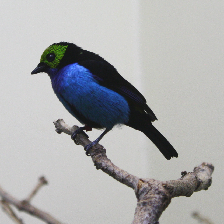

In [5]:
# The bird image I used here is from the public domain
image_path = 'images/bird.jpg'
image = Image.open(image_path)
image = image.resize((224, 224))
image = pure_pil_alpha_to_color_v2(image) if image.mode == 'RGBA' else image
image

In [6]:
# Convert it into an array
x = np.asarray(image, dtype='float32')
x.shape

(224, 224, 3)

In [7]:
# Convert it into a list of arrays
x = np.expand_dims(x, axis=0)
x.shape # should be (1, 224, 224, 3)

(1, 224, 224, 3)

## The last step before we dive into the pre-trained model...

In [8]:
def preprocess_input(x, data_format=None):
    """Preprocesses a tensor encoding a batch of images.
    
    Source: https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py
    
    # Arguments
        x: input Numpy tensor, 4D.
        data_format: data format of the image tensor.
    # Returns
        Preprocessed tensor.
    """
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if data_format == 'channels_first':
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
        # Zero-center by mean pixel
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
    else:
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
        # Zero-center by mean pixel
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
    return x

In [9]:
# Pre-process the input to match the training data
x = preprocess_input(x, 'channels_last')
x.shape # should be (1, 224, 224, 3), again

(1, 224, 224, 3)

## Let's make it

In [10]:
# What does decode_predictions(..) do? Check ⬇️
# https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py#L41
pred = model.predict(x)
decoded_pred = decode_predictions(pred, top=4)[0]
print('Predicted:', decoded_pred)
print('\nMostly possible -> ', decoded_pred[0][1])
print('Probability -> ', decoded_pred[0][2])

Predicted: [('n01537544', 'indigo_bunting', 0.73208612), ('n01806143', 'peacock', 0.086676389), ('n01833805', 'hummingbird', 0.055562843), ('n02017213', 'European_gallinule', 0.049971543)]

Mostly possible ->  indigo_bunting
Probability ->  0.732086


**Contents in this notebook is inspired by [this blog](https://harishnarayanan.org/writing/artistic-style-transfer/).**